In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Sample data split
# df is your DataFrame containing the time series data
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(p, d, q))  # Replace p, d, q with your chosen parameters
model_fit = model.fit()

# Forecasting
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate accuracy metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast) / test)) * 100

# Print metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='gray')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

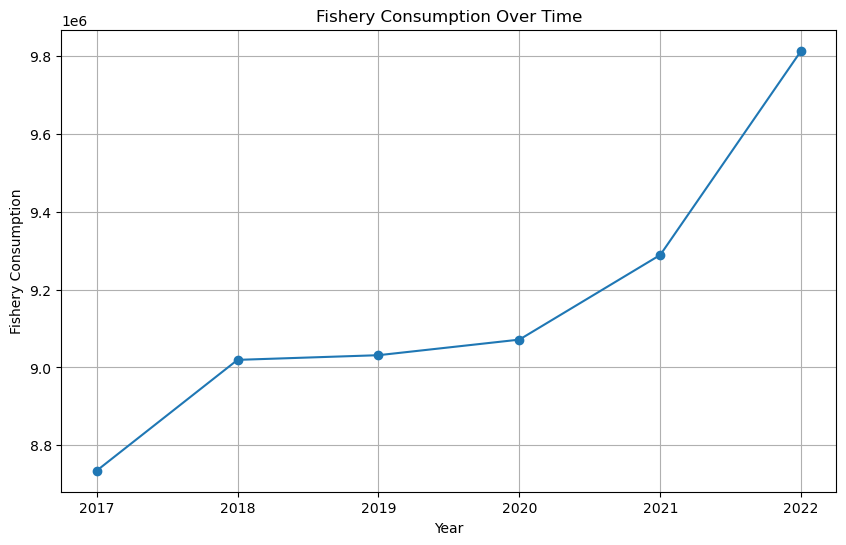

                               SARIMAX Results                                
Dep. Variable:     FisheryConsumption   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -4914007.846
Date:                Fri, 02 Aug 2024   AIC                        9828021.693
Time:                        20:39:00   BIC                        9828020.521
Sample:                             0   HQIC                       9828018.548
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5009   8.56e-07   5.85e+05      0.000       0.501       0.501
ma.L1          0.9956      0.000   6173.889      0.000       0.995       0.996
sigma2      1.161e+04      1.867   6219.541      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par

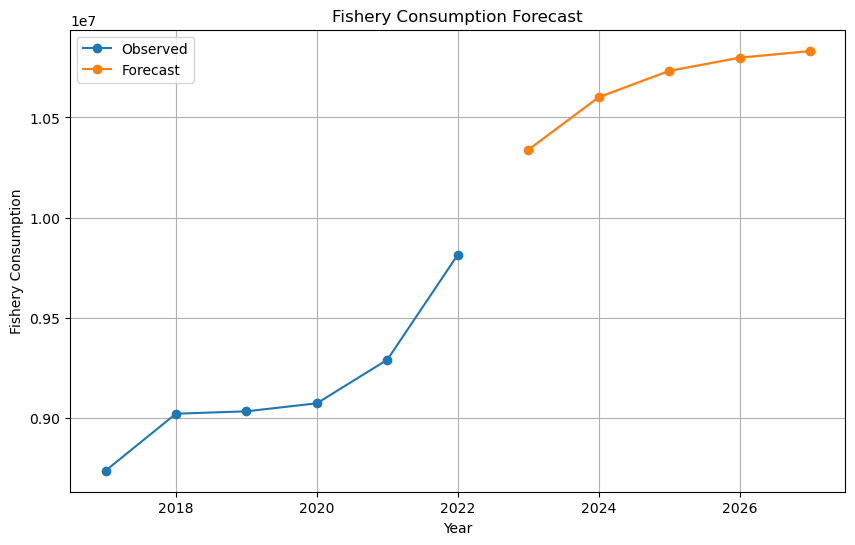

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the temporal data (ensure it's in time-series order)
temporal_data_cleaned = pd.read_csv('preprocessing/cleaned-temporal-data.csv')

# Extract relevant columns
time_series_data = temporal_data_cleaned[['Year', 'FisheryConsumption']].set_index('Year')

# Plot the time series to visualize
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, marker='o')
plt.title('Fishery Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Fishery Consumption')
plt.grid(True)
plt.show()

# Fit ARIMA model (tune the order based on data)
arima_model = ARIMA(time_series_data, order=(1, 1, 1))
arima_result = arima_model.fit()

# Print the summary of the model
print(arima_result.summary())

# Forecasting future values
forecast = arima_result.get_forecast(steps=5)
forecast_index = range(time_series_data.index[-1] + 1, time_series_data.index[-1] + 6)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, marker='o', label='Observed')
plt.plot(forecast_index, forecast_values, marker='o', label='Forecast')
plt.fill_between(forecast_index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], 
                 color='gray', alpha=0.3)
plt.title('Fishery Consumption Forecast')
plt.xlabel('Year')
plt.ylabel('Fishery Consumption')
plt.legend()
plt.grid(True)
plt.show()




/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par

                               SARIMAX Results                                
Dep. Variable:     FisheryConsumption   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -4914007.846
Date:                Sat, 03 Aug 2024   AIC                        9828021.693
Time:                        03:51:30   BIC                        9828020.521
Sample:                             0   HQIC                       9828018.548
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5009   8.56e-07   5.85e+05      0.000       0.501       0.501
ma.L1          0.9956      0.000   6173.889      0.000       0.995       0.996
sigma2      1.161e+04      1.867   6219.541      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


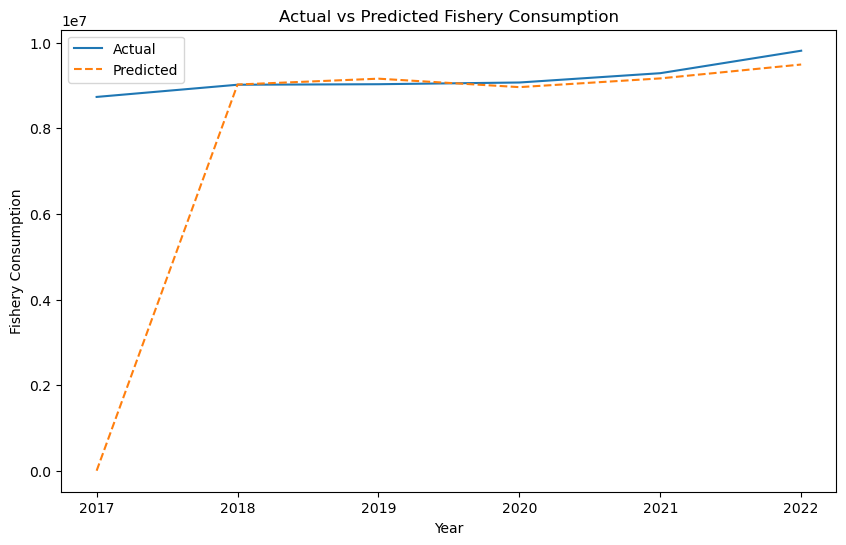

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the data
temporal_data = pd.read_csv('preprocessing/cleaned-temporal-data.csv')

# Set the year as the index
temporal_data.set_index('Year', inplace=True)

# Fit the ARIMA model
model = ARIMA(temporal_data['FisheryConsumption'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Make predictions
# Forecast the next 5 years
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate accuracy (Root Mean Squared Error)
# Since we don't have actual future values, we'll use in-sample predictions for RMSE
predictions = model_fit.predict(start=0, end=len(temporal_data)-1, dynamic=False)
rmse = np.sqrt(mean_squared_error(temporal_data['FisheryConsumption'], predictions))

print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(temporal_data.index, temporal_data['FisheryConsumption'], label='Actual')
plt.plot(temporal_data.index, predictions, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Fishery Consumption')
plt.xlabel('Year')
plt.ylabel('Fishery Consumption')
plt.legend()
plt.show()